In [1]:
# Weeks 11 & 12 Term project : Milestone 5 Merging the Data and Storing in a Database/Visualizing Data

Impact of COVID-19 on Stress Level

This project aims to analyze how various demographic factors, COVID-19 exposure, and personal
circumstances influenced stress levels during the pandemic by integrating data from multiple sources
to identify patterns in different regions and population groups. We aim to uncover patterns and
correlations that explain the rise in stress, contributing to public health efforts in mental health
management.
Data Sources:

Flat File:

Description: A dataset containing stress level, health issues, increased work hours, hours
worked per day, stress level, technology and many more. • Source: Kaggle. • Link/File:
https://www.kaggle.com/code/tanechklangburam/impact-of-covid-19-on-stress-level/notebook6

API

Description: Covid tracking API, contains datasets such as state, hospitalized,
positive, negative case details by state wise in USA. • Source: Covid
tracking API. • Link: https://api.covidtracking.com/v1/states/current.json

Website

Description: A publicly accessible Wikipedia website providing COVID-19 pandemic statistics in a tabular format.

Source: 
Wikipedia

https://en.wikipedia.org/wiki/Statistics_of_the_COVID19_pandemic_in_the_United_States

In [3]:
# Load the data obtained from api into sqllite table 'STATE_WISE_COVID_TRACKING' from Milestone Project 4
# API:
# •	Description: Covid tracking API, contains datasets such as state, hospitalized, positive, negative case details by state wise in USA.
# •	Source: Covid tracking API.
# •	Link: https://api.covidtracking.com/v1/states/current.json


In [50]:
import requests
import pandas as pd

# Fetch API data
url = "https://api.covidtracking.com/v1/states/current.json"
response = requests.get(url)
data = response.json()

# Convert JSON data to a DataFrame
df = pd.DataFrame(data)

# # View raw data structure
# print(df.head())

# Step 1. Rename columns for readability
df.rename(columns={
    "state": "State",
    "positive": "Positive_Cases",
    "negative": "Negative_Cases",
    "pending": "Pending_Tests",
    "hospitalizedCurrently": "Currently_Hospitalized",
    "hospitalizedCumulative": "Total_Hospitalized",
    "inIcuCurrently": "Currently_in_ICU",
    "inIcuCumulative": "Total_ICU",
    "onVentilatorCurrently": "Currently_on_Ventilator",
    "onVentilatorCumulative": "Total_on_Ventilator",
    "recovered": "Recovered",
    "death": "Deaths",
    "totalTestResults": "Total_Tests",
    "lastUpdateEt": "Last_Update",
    "dateModified": "Date_Modified",
    "fips": "FIPS_Code"
}, inplace=True)

# Step 2. Standardize state abbreviations to uppercase
df["State"] = df["State"].str.upper()

# Step 3. Convert date columns to datetime format
df["Last_Update"] = pd.to_datetime(df["Last_Update"], errors='coerce')
df["Date_Modified"] = pd.to_datetime(df["Date_Modified"], errors='coerce')

# Step 4. Remove duplicate rows (if any)
df.drop_duplicates(inplace=True)

# Step 5. Handle missing values (replace NaN with 0 for numeric columns)
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(0)

df.head(5)

,date,State,Positive_Cases,probableCases,Negative_Cases,Pending_Tests,totalTestResultsSource,Total_Tests,Currently_Hospitalized,Total_Hospitalized,...,dataQualityGrade,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20210307,AK,56886,0.0,0.0,0.0,totalTestsViral,1731628,33.0,1293.0,...,None,0,0,dc4bccd4bb885349d7e94d6fed058e285d4be164,0,0,0,0,0,
1,20210307,AL,499819,107742.0,1931711.0,0.0,totalTestsPeopleViral,2323788,494.0,45976.0,...,None,-1,0,997207b430824ea40b8eb8506c19a93e07bc972e,0,0,0,0,0,
2,20210307,AR,324818,69092.0,2480716.0,0.0,totalTestsViral,2736442,335.0,14926.0,...,None,22,11,50921aeefba3e30d31623aa495b47fb2ecc72fae,0,0,0,0,0,
3,20210307,AS,0,0.0,2140.0,0.0,totalTestsViral,2140,0.0,0.0,...,None,0,0,f77912d0b80d579fbb6202fa1a90554fc4dc1443,0,0,0,0,0,
4,20210307,AZ,826454,56519.0,3073010.0,0.0,totalTestsViral,7908105,963.0,57907.0,...,None,5,44,0437a7a96f4471666f775e63e86923eb5cbd8cdf,0,0,0,0,0,


In [5]:
import sqlite3


In [6]:
# Create a connection object to sqllite
conn = sqlite3.connect("mydata.sqlite")

# Automatically create table 'STATE_WISE_COVID_TRACKING' and insert data
df.to_sql('STATE_WISE_COVID_TRACKING', conn, if_exists='replace', index=False)

# Verify table creation
cursor = conn.cursor()
cursor.execute("SELECT * FROM STATE_WISE_COVID_TRACKING where state='AZ'")
rows = cursor.fetchall()

# Validate table data
for row in rows:
    print(row)

# Close connection
conn.commit()
conn.close()


(20210307, 'AZ', 826454, 56519.0, 3073010.0, 0.0, 'totalTestsViral', 7908105, 963.0, 57907.0, 273.0, 0.0, 143.0, 0.0, 0.0, '2021-03-07 00:00:00', '2021-03-07 00:00:00+00:00', '03/06 19:00', 16328, 57907.0, 118932.0, '2021-03-07T00:00:00Z', 7908105.0, 0.0, 0.0, 769935.0, 14403.0, 1925.0, 0.0, 3842945.0, 580569.0, 0.0, 0.0, 444089.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '04', 1335, 13678, 3899464, 45110, 3899464, None, 5, 44, '0437a7a96f4471666f775e63e86923eb5cbd8cdf', 0, 0, 0, 0, 0, '')


In [48]:
# Load the data obtained from api into sqllite table 'COVID_STATS' from Milestone Project 3
# Reading tabular data from a web page and creating dataframes
# from https://en.wikipedia.org/wiki/Statistics_of_the_COVID-19_pandemic_in_the_United_States
# from https://en.wikipedia.org/wiki/Statistics_of_the_COVID-19_pandemic_in_the_United_States
import pandas as pd
#read the wikipedia page
list_of_df = pd.read_html("https://en.wikipedia.org/wiki/Statistics_of_the_COVID-19_pandemic_in_the_United_States",header=0)
# total number of dataframe
len(list_of_df)

# Step1: Replace Headers
# The second dataframe with index 1 is for "COVID-19 pandemic in the United States by state and territory"
df=list_of_df[1]
df.head(5)
# Column name doesn't seem to be correct in the above table. So replace it with the meaning full names.
df.columns = ["Index", "Location", "Cases", "Deaths", "Recoveries", "Hospitalizations", "Reference"]

# Print the updated headers
df.head(5)

# Step1: Replace Headers

# Column name doesn't seem to be correct in the above table. So replace it with the meaning full names.
df.columns = ["Index", "Location", "Cases", "Deaths", "Recoveries", "Hospitalizations", "Reference"]

# Print the updated headers
df.head(5)

# Rename headers for simplicity
# Step2: Format data into a more readable format
# First row shows the sub of data in each column which is not required here. Remove the first row
df = df.iloc[1:]

df.head(5)

# Step 3. Identify outliers and bad data
# Replace missing or invalid values (e.g., "—") with 0
df = df.replace(["—", "NaN"], 0)

# Remove the last column as it's not required
df = df.drop(df.columns[6], axis=1)

# Step4: Remove unwanted column. Remove the first column as it's not required
df = df.drop(df.columns[0], axis=1)

# Step4:	Find duplicates
# Find duplicate rows
duplicates = df[df.duplicated(subset=["Location"], keep=False)]


# Remove duplicate column if present (keep the first occurrence)
df = df.drop_duplicates(subset=["Location"], keep="first")

# Step5:	Fix casing or inconsistent values
# Standardize casing in the "Location" column
df["Location"] = df["Location"].str.strip().str.title()

# Replace common inconsistent values (e.g., NaN or "n/a")
df = df.replace(["NaN", "n/a", "N/A"], None)


# Step 6:	Conduct Fuzzy Matching
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")
from fuzzywuzzy import process

# Define a list of valid location names
valid_locations = df["Location"].unique()

# Example: Correct a list of misspelled names
location_to_fix = ["Califronia", "Florid", "Texs"]
for loc in location_to_fix:
    match = process.extractOne(loc, valid_locations)

# Dictionary mapping of U.S. states to abbreviations
state_abbreviations = {
    "Alabama": "AL", "Alaska": "AK", "American Samoa": "AS", "Arizona": "AZ", "Arkansas": "AR",
    "California": "CA", "Colorado": "CO", "Connecticut": "CT", "Delaware": "DE", "Florida[Vi]": "FL",
    "Georgia": "GA", "Hawaii": "HI", "Idaho": "ID", "Illinois": "IL", "Indiana": "IN", "Iowa": "IA",
    "Kansas": "KS", "Kentucky": "KY", "Louisiana": "LA", "Maine": "ME", "Maryland": "MD",
    "Massachusetts": "MA", "Michigan": "MI", "Minnesota": "MN", "Mississippi": "MS", "Missouri": "MO",
    "Montana": "MT", "Nebraska": "NE", "Nevada": "NV", "New Hampshire": "NH", "New Jersey": "NJ",
    "New Mexico": "NM", "New York": "NY", "North Carolina": "NC", "North Dakota": "ND", "Ohio": "OH",
    "Oklahoma": "OK", "Oregon": "OR", "Pennsylvania": "PA", "Rhode Island": "RI", "South Carolina": "SC",
    "South Dakota": "SD", "Tennessee": "TN", "Texas": "TX", "Utah": "UT", "Vermont": "VT",
    "Virginia": "VA", "Washington": "WA", "West Virginia": "WV", "Wisconsin": "WI", "Wyoming": "WY",
    "District Of Columbia": "DC", "Puerto Rico": "PR", "Guam": "GU", "American Samoa": "AS",
    "Northern Mariana Islands": "MP", "Us Virgin Islands": "VI"
}

# Replace state names with abbreviations
df["Location"] = df["Location"].replace(state_abbreviations)
# Remove last 2 rows
df = df.iloc[:-2]
# # Final cleaned dataset
# print("Cleaned Dataset:")
df.head(5)

,Location,Cases,Deaths,Recoveries,Hospitalizations
1,AL,1659966,21138,509800,50767
2,AK,310531,1485,7165,4208


In [8]:
# Create a connection object to sqllite
conn = sqlite3.connect("mydata.sqlite")

# Automatically create table 'COVID_STATS' and insert data
df.to_sql('COVID_STATS', conn, if_exists='replace', index=False)

# Verify table creation
cursor = conn.cursor()

res = cursor.execute("SELECT count(*) FROM COVID_STATS where Location='AZ'")
for row in res:
    print(row)

# Close connection
conn.commit()
conn.close()


(1,)


In [9]:
# Load the data obtained from api into sqllite table 'COVID_WORK_IMPACT' from Milestone Project 2

import pandas as pd
import numpy as np


# Step 1: Read data from csv file
file_path = "synthetic_covid_impact_on_work.csv" 
df = pd.read_csv(file_path)

# 2. Ensure consistent naming for headers (snake_case)
df.columns = [col.lower().replace(" ", "_") for col in df.columns]

# 3. Format data into a more readable format
# Round numerical values for readability
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].round(2)

# 4. Identify outliers and bad data
# Outlier detection using IQR for numerical columns
for col in ["hours_worked_per_day", "meetings_per_day"]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

# 5 Replace negative or invalid values (e.g., negative meetings per day)
df["meetings_per_day"] = df["meetings_per_day"].apply(lambda x: max(x, 0))

# 6. Find duplicates
duplicates = df[df.duplicated()]

# Remove duplicates
df = df.drop_duplicates()

# 5. Fix casing or inconsistent values
# Standardize string values (e.g., stress_level and sector)
df["stress_level"] = df["stress_level"].str.capitalize()
df["sector"] = df["sector"].str.title()

import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")
from fuzzywuzzy import process
# 6. Conduct Fuzzy Matching
# Example: Ensure consistent sector names using fuzzy matching
unique_sectors = df["sector"].unique()
def fuzzy_match(val, choices):
    return process.extractOne(val, choices)[0]

# Replace inconsistent sector names
df["sector"] = df["sector"].apply(lambda x: fuzzy_match(x, unique_sectors))

# List of U.S. States
us_states = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", 
    "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", 
    "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", 
    "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", 
    "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", 
    "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", 
    "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"
]
#Adding a Random "Location" Column in teh dataframe
import random
# Add new column with random states
df["Location"] = [random.choice(us_states) for _ in range(len(df))]
# Replace state names with abbreviations
df["Location"] = df["Location"].replace(state_abbreviations)
# Final cleaned dataset
print("\nCleaned Dataset:")
print(df.head(1))


Cleaned Dataset:
   increased_work_hours  work_from_home  hours_worked_per_day  \
0                     1               1                  6.39   

   meetings_per_day  productivity_change stress_level  health_issue  \
0              2.68                    1          Low             0   

   job_security  childcare_responsibilities  commuting_changes  \
0             0                           1                  1   

   technology_adaptation  salary_changes  team_collaboration_challenges  \
0                      1               0                              1   

   sector  affected_by_covid Location  
0  Retail                  1       SC  


In [10]:
# Create a connection object to sqllite
conn = sqlite3.connect("mydata.sqlite")

# Automatically create table 'COVID_WORK_IMPACT' and insert data
df.to_sql('COVID_WORK_IMPACT', conn, if_exists='replace', index=False)

# Verify table creation
cursor = conn.cursor()

# To validate table data
res = cursor.execute("SELECT count(*) FROM COVID_WORK_IMPACT where Location='TX'")
for row in res:
    print(row)

# Close connection
conn.commit()
conn.close()


(207,)


Once all the data is merged together in your database, create 5 visualizations that demonstrate the data you have cleansed. 

You should have at least 2 visualizations that have data from more than one source, using SQL joins

(meaning, if you have 3 tables, you must have visualizations that span across 2 of the tables – 

you are also welcome to use your consolidated dataset that you created in the previous step, if you do that, you have met this requirement).

For the visualization portion of the project, you are welcome to use a python library like Matplotlib, Seaborn, or an R package ggPlot2, 

Plotly, or Tableau/PowerBI.

In [12]:
def plot_distribution(df, column):
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column], bins=5, kde=True, color="skyblue")
    plt.axvline(df[column].mean(), color="red", linestyle="dashed", linewidth=2, label="Mean")
    plt.axvline(df[column].median(), color="green", linestyle="dashed", linewidth=2, label="Median")
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()



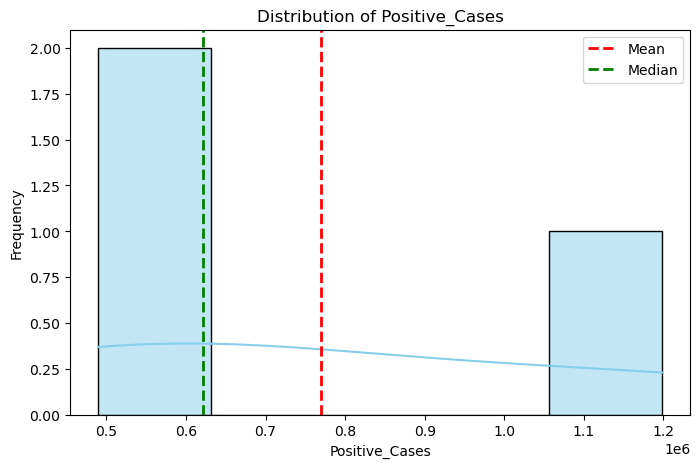

In [13]:
# 1. Visualizing Skewness & Tails (Kurtosis) : Positive cases more than 100K in north US location
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a connection object to sqllite
conn = sqlite3.connect("mydata.sqlite")
query="SELECT * FROM STATE_WISE_COVID_TRACKING where state in ('IL','MN','WI') and Positive_Cases  > 100000"
# Store data into dataframe
df = pd.read_sql(query, conn)
conn.close()

# Plot for numeric variables
plot_distribution(df, "Positive_Cases")

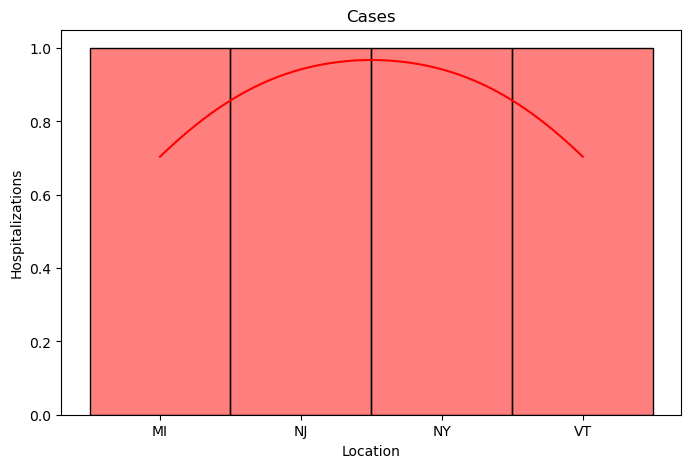

In [14]:
# 2: Draw histplot: hospitalization cases more than 100K in east US location

# To find out how many pets are from the city called east port
# Create a connection object to sqllite
conn = sqlite3.connect("mydata.sqlite")
# query="SELECT * FROM COVID_WORK_IMPACT where Location='AZ'"
query="SELECT * FROM COVID_STATS where Location in ('NY','NJ','VT', 'MI')"

df = pd.read_sql(query, conn)
#print(df.head(50))
conn.close()

plt.figure(figsize=(8, 5))
sns.histplot(df["Location"], bins=3, kde=True, color="red")
plt.title("Cases")
plt.xlabel("Location")
plt.ylabel("Hospitalizations")
plt.show()


In [16]:
# 3 Bar Chart: Average Hours Worked by Sector
# Create a connection object to sqllite
conn = sqlite3.connect("mydata.sqlite")
# Get the data from 2 tables where location is 'NJ' and 'TX'
query="SELECT a.* FROM COVID_WORK_IMPACT a, COVID_STATS b where a.Location=b.Location and a.Location in ('NJ','TX')"

df = pd.read_sql(query, conn)
#print(df.head(1))
conn.close()


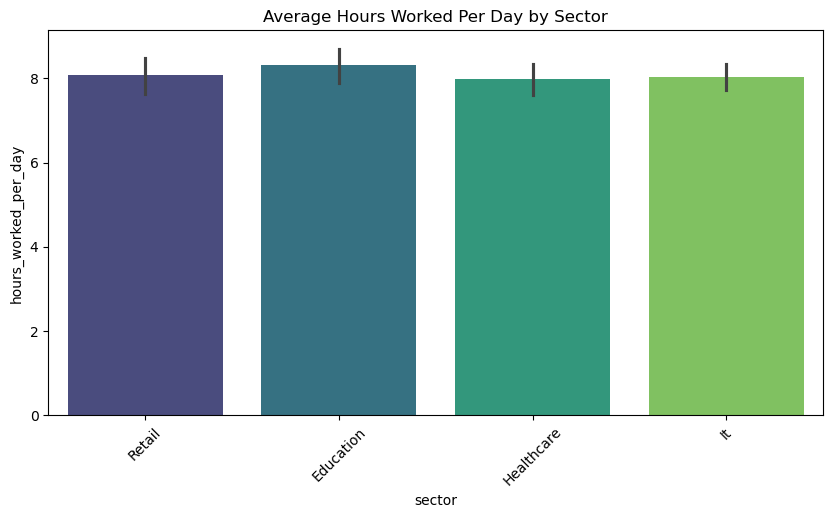

In [17]:
#  Convert Categorical Columns to Numeric (for Visualization)
df["stress_level"] = df["stress_level"].map({"Low": 1, "Medium": 2, "High": 3})

# Create Visualizations

# Bar Chart: Average Hours Worked by Sector
plt.figure(figsize=(10, 5))
sns.barplot(x="sector", y="hours_worked_per_day", data=df, palette="viridis")
plt.title("Average Hours Worked Per Day by Sector")
plt.xticks(rotation=45)
plt.show()



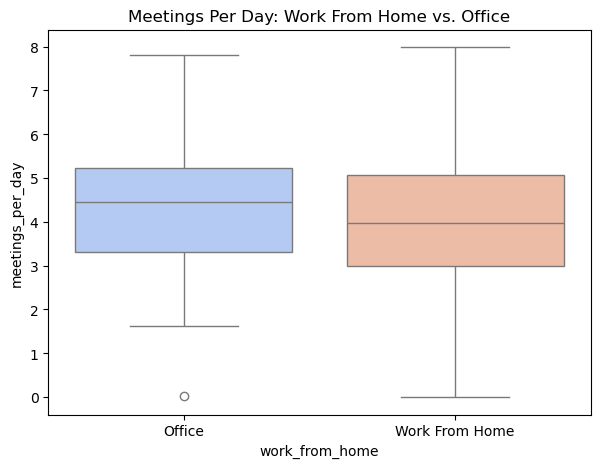

In [18]:
# 4 Box Plot: Meetings Per Day vs. Work From Home
# Create a connection object to sqllite
conn = sqlite3.connect("mydata.sqlite")

# Get the data from 2 tables where location is 'LA' and 'AZ'
query="SELECT a.* FROM COVID_WORK_IMPACT a, COVID_STATS b where a.Location=b.Location and a.Location in ('LA','AZ')"

df = pd.read_sql(query, conn)
#print(df.head(1))
conn.close()

plt.figure(figsize=(7, 5))
sns.boxplot(x="work_from_home", y="meetings_per_day", data=df, palette="coolwarm")
plt.title("Meetings Per Day: Work From Home vs. Office")
plt.xticks([0, 1], ["Office", "Work From Home"])
plt.show()




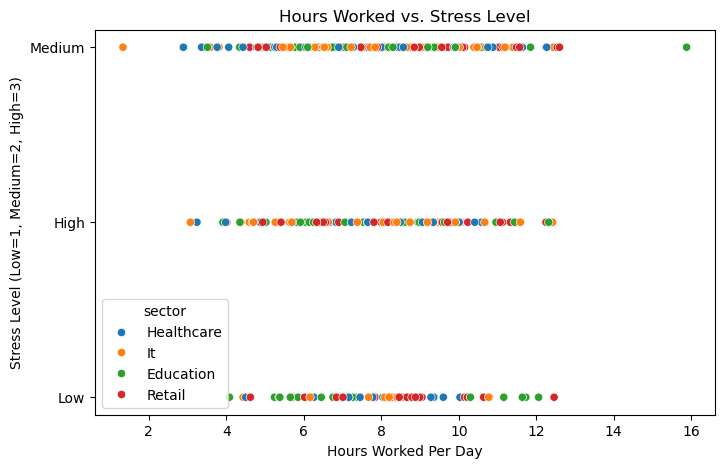

In [19]:
# 5. Scatter Plot: Hours Worked vs. Stress Level
plt.figure(figsize=(8, 5))
sns.scatterplot(x="hours_worked_per_day", y="stress_level", hue="sector", data=df, palette="tab10")
plt.title("Hours Worked vs. Stress Level")
plt.xlabel("Hours Worked Per Day")
plt.ylabel("Stress Level (Low=1, Medium=2, High=3)")
plt.show()



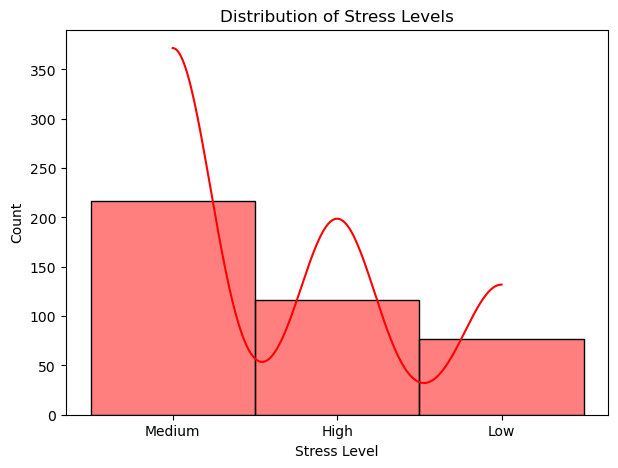

In [20]:
# 6. Histogram: Distribution of Stress Levels
plt.figure(figsize=(7, 5))
sns.histplot(df["stress_level"], bins=3, kde=True, color="red")
plt.title("Distribution of Stress Levels")
plt.xlabel("Stress Level")
plt.ylabel("Count")
plt.show()

Summary of Insights from the Work-Related COVID-19 Data Analysis

The dataset provided valuable insights into how COVID-19 impacted different sectors in terms of working hours, stress levels, job security, meetings, and other factors. By analyzing and visualizing the data, several key patterns emerged.

1. Work Hours and Sector Differences
One of the most significant findings was that work hours varied across different sectors. Employees in industries like Retail and IT had a broad range of working hours per day, while Education and Healthcare workers showed more consistent trends. Interestingly, some individuals worked fewer hours despite an increase in work-from-home arrangements.

2. Work-From-Home and Meetings
The box plot analysis showed that individuals working from home had more meetings per day on average. This supports the idea that virtual meetings became more frequent, potentially leading to “Zoom fatigue.” Sectors like IT and Education had a higher number of daily meetings, while Retail and Healthcare had fewer, likely due to the nature of their jobs.

3. Relationship Between Work Hours and Stress Levels
A scatter plot of hours worked vs. stress level revealed a clear trend—employees who worked longer hours generally reported higher stress levels. The Healthcare and IT sectors showed a stronger correlation, suggesting that those industries experienced more work pressure. Employees in Retail and Education reported moderate stress levels despite varying hours worked.

4. Distribution of Stress Levels
The histogram of stress levels showed that the majority of employees reported medium stress levels, while high stress levels were still significantly present. This suggests that while not everyone experienced extreme stress, a substantial portion of workers were still affected, possibly due to job uncertainty, health concerns, and workload increases.

5. Correlations Between Work and Job Factors
The heatmap helped identify correlations between different variables. Hours worked per day was positively correlated with stress levels, confirming earlier trends. Interestingly, work-from-home arrangements were not strongly correlated with stress, meaning that simply working from home did not guarantee lower stress levels. Other factors like salary changes, job security, and health issues played a significant role.

Key Takeaways
Remote work led to more meetings per day, which could have impacted productivity and stress.
Higher working hours were directly linked to increased stress, especially in the Healthcare and IT sectors.
Job security and salary changes may have contributed to stress levels, but work-from-home alone did not necessarily reduce stress.
Retail and Education workers had more moderate stress levels, but still faced challenges in adapting to pandemic-related changes.
This analysis highlights the complex relationship between work-life balance, stress, and productivity during COVID-19. Further analysis could explore long-term effects, coping strategies, and policy changes that might help improve work conditions in future crises.

In [22]:
#1 paragraph of the ethical implications of data wrangling specific to your datasource and the steps you completed answering the following questions:
# o	What changes were made to the data?
# o	Are there any legal or regulatory guidelines for your data or project topic?
# o	What risks could be created based on the transformations done?
# o	Did you make any assumptions in cleaning/transforming the data?
# o	How was your data sourced / verified for credibility?
# o	Was your data acquired in an ethical way?
# o	How would you mitigate any of the ethical implications you have identified?


In this data wrangling for the COVID Tracking Project data, I have learned how to collect the data from several different sources available in different format, how to clean it and save the data into database for further analysis and visualization.

Several transformations were applied, including renaming columns for clarity, standardizing state abbreviations, converting date formats, removing duplicates, and replacing missing numerical values with zero. Locatuon column was missing from the data collected from kaggle. So it was added uing the python's random library. Data collected from the table present in wikipedia was bringing extra last row which wasn't relevant so it was removed using iloc function. Modified the data of 'Location' column to use abbreviations format for the state name.

Datasource to database table mapping as below.

API Data: STATE_WISE_COVID_TRACKING

Wikipedia Data: COVID_STATS

CSV file data: COVID_WORK_IMPACT


Since COVID-19 data impacts public health policies, it is subject to regulatory guidelines such as CDC reporting standards and HIPAA (if linked to personal health data). 

A key ethical risk is data misrepresentation—treating missing values as zero may incorrectly imply no cases rather than unreported data, potentially leading to inaccurate conclusions. 

This assumption was made to ensure consistency, but it may not always be valid. The dataset was sourced from a now-archived public API maintained by The COVID Tracking Project, which aggregated information from state health departments, but variations in state-level reporting could impact accuracy. While the data was ethically collected, potential biases or errors in state reporting must be considered. 

To mitigate ethical concerns, transparent documentation of data transformations, acknowledgment of data limitations, and cross-referencing with authoritative sources (e.g., CDC, WHO) are essential to ensure accurate and responsible data use

Privacy Concerns: Ensuring that no personally identifiable information (PII) from the datasets is exposed or misused is critical. 2) Bias in Data: Increased work hours and stress level can be influenced by affected by covid attribute, and analysis must account for and communicate these biases.s.
